# Домашнее задание к семинару 02 (HW02)

## Тема: работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2.3.1. Загрузка данных и первичный осмотр

df = pd.read_csv('S02-hw-dataset.csv', sep=',')

df.head() # Первые строки датасет

In [23]:
df.info() # Информацию о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [24]:
df.describe() # Базовые описательные статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [28]:
# 2.3.2. Пропуски, дубликаты и базовый контроль качества

# Пропуски
missing_data = df.isna().mean()
missing_percent = (df.isna().mean() / len(df)) * 100
missing_df = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Доля пропусков (%)': missing_percent
})
print("Анализ пропущенных значений:")
print(missing_df)


Анализ пропущенных значений:
           Количество пропусков  Доля пропусков (%)
user_id                 0.00000            0.000000
age                     0.04878            0.118977
country                 0.00000            0.000000
purchases               0.00000            0.000000
revenue                 0.00000            0.000000


In [30]:
# Дубликаты
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Количество полностью дублирующих строк: {num_duplicates}")

if num_duplicates > 0:
    print("\nДублирующие строки:")
    print(df[duplicates])
else:
    print("Дублирующих строк не найдено.")


Количество полностью дублирующих строк: 1

Дублирующие строки:
    user_id   age country  purchases  revenue
40       10  24.0      RU          7      511


In [32]:
# Поиск подозрительных значений: отрицательные purchases
negative_purchases = df[df['purchases'] < 0]
print("Строки с отрицательным количеством покупок:")
print(negative_purchases)


Строки с отрицательным количеством покупок:
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [36]:
# Поиск подозрительных значений: возраст
# Проверяем возраст (к примеру, разрешаем делать покупки только после 12 лет :D ) < 12 или > 100
suspicious_age = df[(df['age'] < 12) | (df['age'] > 100)]
print("Строки с подозрительным возрастом (< 12 или > 100):")
print(suspicious_age)


Строки с подозрительным возрастом (< 12 или > 100):
    user_id    age country  purchases  revenue
5         6  120.0      FR         -1      785
20       21    5.0      RU          8     1488


In [41]:
# Поиск логических противоречий: нулевой доход при ненулевых покупках
zero_revenue_with_purchases = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
print("Строки с нулевым доход при ненулевых покупках:")
print(zero_revenue_with_purchases)


Строки с нулевым доход при ненулевых покупках:
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


In [40]:
# Поиск логических противоречий: ненулевой доход при нулевых покупках
nonzero_revenue_with_zero_purchases = df[(df['revenue'] > 0) & (df['purchases'] == 0)]
print("Строки с ненулевым доход при нулевых покупках:")
print(nonzero_revenue_with_zero_purchases)


Строки с ненулевым доход при нулевых покупках:
Empty DataFrame
Columns: [user_id, age, country, purchases, revenue]
Index: []


### Анализ найденных проблем качества данных

**Пропуски данных:** В столбце age обнаружены пропущенные значения (2 записи), что составляет примерно 4.8% от общего количества записей. Это может затруднить анализ возрастных паттернов.

**Дубликаты:** Обнаружена одна полностью дублирующая строка (user_id=10), а также дубликат по user_id (строки с user_id=2 и user_id=10 имеют идентичные данные, кроме самого user_id). Это указывает на возможную ошибку при сборе или загрузке данных.

**Подозрительные значения:** 
- Найдена запись с отрицательным количеством покупок (purchases = -1), что логически невозможно.
- Обнаружены странные значения возраста: один пользователь имеет возраст 120 лет, другой - 5 лет, что может быть ошибкой ввода данных.
- Выявлены логические противоречия: несколько записей имеют нулевой доход при ненулевых покупках, что может указывать на незавершенные транзакции или ошибки в данных.

In [38]:
# 2.3.3. Базовый EDA: группировки, агрегаты и частоты

# Частоты по категориальной переменной: страна
country_counts = df['country'].value_counts()
print("Распределение пользователей по странам:")
print(country_counts)
print(f"\nДоля каждой страны:")
print((country_counts / len(df) * 100).round(2))

Распределение пользователей по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Доля каждой страны:
country
RU    31.71
FR    29.27
US    19.51
DE    14.63
CN     4.88
Name: count, dtype: float64


In [42]:
# Группировка по странам с агрегатами
country_stats = df.groupby('country').agg({
    'purchases': ['mean', 'sum', 'count'],
    'revenue': ['mean', 'sum'],
    'age': 'mean'
}).round(2)

country_stats.columns = ['Средние покупки', 'Сумма покупок', 'Количество пользователей', 
                        'Средний доход', 'Суммарный доход', 'Средний возраст']
print("Статистика по странам:")
print(country_stats)


Статистика по странам:
         Средние покупки  Сумма покупок  Количество пользователей  \
country                                                             
CN                  4.50              9                         2   
DE                  6.50             39                         6   
FR                  4.25             51                        12   
RU                  4.77             62                        13   
US                  4.62             37                         8   

         Средний доход  Суммарный доход  Средний возраст  
country                                                   
CN             1054.00             2108            24.00  
DE             1445.50             8673            34.60  
FR              675.92             8111            46.25  
RU              790.08            10271            30.08  
US              557.38             4459            36.71  


In [46]:
# Создание возрастных групп для дополнительного анализа
df['age_group'] = pd.cut(df['age'], 
                        bins=[0, 25, 35, 45, 100], 
                        labels=['18-25', '26-35', '36-45', '46+'],
                        include_lowest=True)

# Группировка по возрастным группам
age_group_stats = df.groupby('age_group', dropna=True, observed=True).agg({
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum'],
    'user_id': 'count'
}).round(2)

age_group_stats.columns = ['Средние покупки', 'Сумма покупок', 
                           'Средний доход', 'Суммарный доход', 'Количество пользователей']
print("Статистика по возрастным группам:")
print(age_group_stats)


Статистика по возрастным группам:
           Средние покупки  Сумма покупок  Средний доход  Суммарный доход  \
age_group                                                                   
18-25                 5.17             62         700.67             8408   
26-35                 4.91             54         946.82            10415   
36-45                 4.83             29        1106.00             6636   
46+                   4.33             39         605.78             5452   

           Количество пользователей  
age_group                            
18-25                            12  
26-35                            11  
36-45                             6  
46+                               9  


### Основные наблюдения по EDA

Больше всего пользователей из России (31.7%) и Франции (29.3%), меньше всего из Китая (4.9%). Но по средним показателям покупок и дохода лидирует Германия - там среднее количество покупок 6.50 (у других стран около 4-5), а средний доход 1445.50, что намного выше остальных. США показывают самый низкий средний доход (557.38), хотя пользователей там больше, чем в Германии.

По возрастным группам интересная картина: группа 26-35 лет имеет самый высокий средний доход (946.82) и самую большую суммарную выручку, хотя по количеству покупок их опережает группа 18-25 лет. Группа 36-45 лет показывает самый высокий доход на одного пользователя (1106.00), но таких пользователей всего 6. Группа 46+ лет имеет самый низкий средний доход (605.78). Также Германия с всего 6 пользователями генерирует доход в 2.5 раза больше, чем США с 8 пользователями.
Есть пользователь из США с 4 покупками, но нулевым доходом, что выглядит как ошибка в данных.


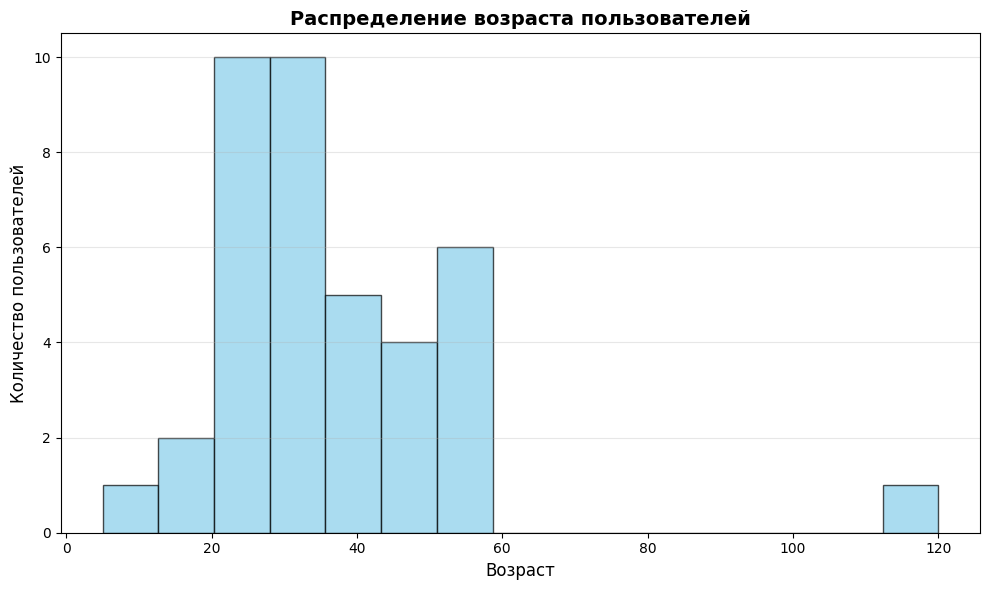

Гистограмма сохранена в figures/age_distribution_histogram.png
Гистограмма показывает распределение возраста пользователей.
Видно, что большинство пользователей находятся в возрасте 20-50 лет.


In [50]:
# 2.4. Визуализация данных в Matplotlib

# Гистограмма распределения возраста
plt.figure(figsize=(10, 6))
plt.hist(df['age'].dropna(), bins=15, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/age_distribution_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("Гистограмма сохранена в figures/age_distribution_histogram.png")
print("Гистограмма показывает распределение возраста пользователей.")
print("Видно, что большинство пользователей находятся в возрасте 20-50 лет.")


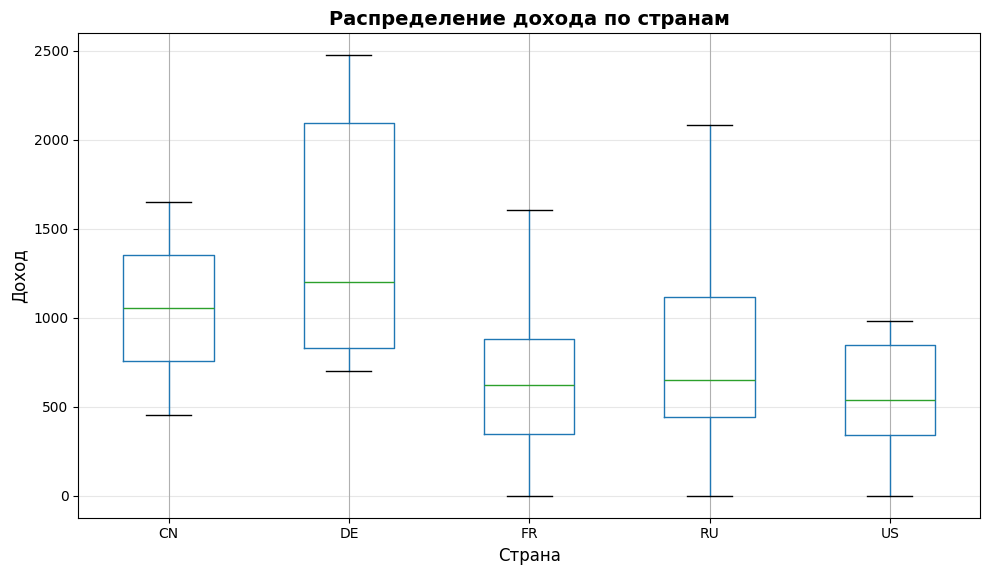

Boxplot сохранен в figures/revenue_by_country_boxplot.png
График показывает распределение revenue по странам, включая медиану, квартили и выбросы.


In [59]:
# Boxplot для дохода по странам
plt.figure(figsize=(10, 6))
df.boxplot(column='revenue', by='country', ax=plt.gca())
plt.suptitle('')
plt.title('Распределение дохода по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/revenue_by_country_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Boxplot сохранен в figures/revenue_by_country_boxplot.png")
print("График показывает распределение revenue по странам, включая медиану, квартили и выбросы.")


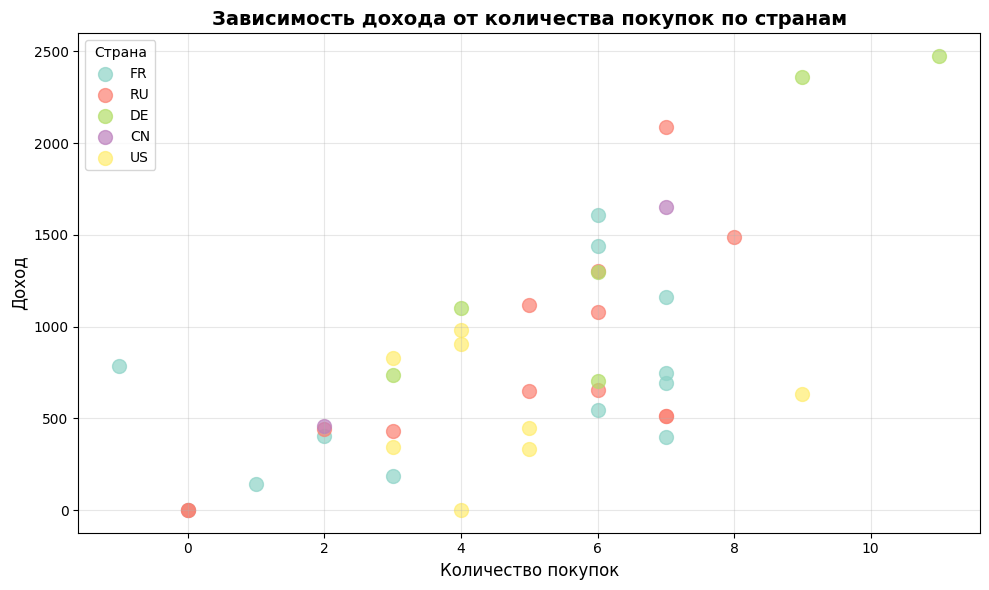

Scatter plot сохранен в figures/purchases_vs_revenue_scatter.png
График показывает связь между количеством покупок и revenue, с разбивкой по странам.
Видна положительная корреляция: чем больше покупок, тем выше доход.


In [61]:
# Scatter plot: покупки vs доход с цветовой кодировкой по странам
plt.figure(figsize=(10, 6))
countries = df['country'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(countries)))

for i, country in enumerate(countries):
    country_data = df[df['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'], 
               label=country, color=colors[i], alpha=0.7, s=100)

plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.title('Зависимость дохода от количества покупок по странам', fontsize=14, fontweight='bold')
plt.legend(title='Страна', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('figures/purchases_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("Scatter plot сохранен в figures/purchases_vs_revenue_scatter.png")
print("График показывает связь между количеством покупок и revenue, с разбивкой по странам.")
print("Видна положительная корреляция: чем больше покупок, тем выше доход.")


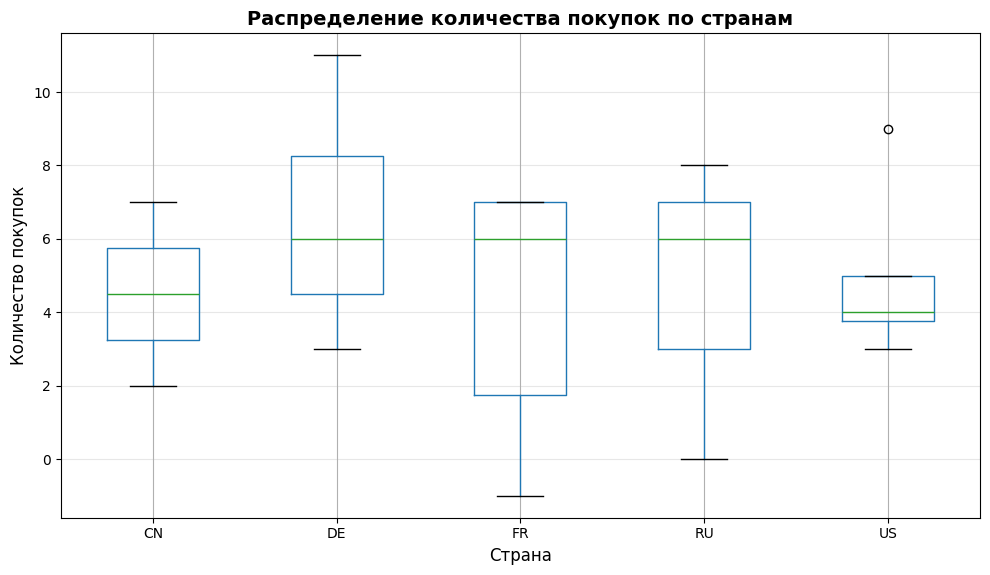

Boxplot показывает распределение количества покупок по странам.
Видно, что в Германии (DE) медианное значение покупок выше, чем в других странах.


In [55]:
# Дополнительный boxplot для покупок по странам
plt.figure(figsize=(10, 6))
df.boxplot(column='purchases', by='country', ax=plt.gca())
plt.suptitle('')
plt.title('Распределение количества покупок по странам', fontsize=14, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Количество покупок', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Boxplot показывает распределение количества покупок по странам.")
print("Видно, что в Германии (DE) медианное значение покупок выше, чем в других странах.")
